# First steps in Deep Learning with Keras 

In [3]:
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['axes.axisbelow'] = True

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

Using TensorFlow backend.


### Deep learning with Keras

#### First steps with Keras 

- Doc keras :https://keras.io/
- The Sequential model : https://keras.io/getting-started/sequential-model-guide/#getting-started-with-the-keras-sequential-model
- A richer framework : https://keras.io/getting-started/functional-api-guide/

## Importing Mnist dataset (and normalizing it)

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
nb_classes = 10

In [47]:
X_train.shape

(60000, 28, 28)

In [48]:
# We shape entries as vector and normalize it (gray pixels have values between 0 and 255)
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

In [49]:
# y are classes number (between 0 and 9 so we one hot encode them
y_train =  np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Learning a MLP for Mnist classification


### Model building

The layers are added one by one. Here is a model that:
- takes as input a vector of dimension 784 (a Mnist 28x28 vectorized image);
- transforms the input into a 64-dimensional vector with a fully connected layer (Dense), followed by a Rectified Linear Unit activation;
- transforms the output of the previous layer (dimension 64) into a vector of dimension 10 with another dense layer;
- activates the last output with a softmax activation function.

Then we compile the model by specifying:
- the optimization criterion, the loss;
- the optimization routine, optimize it;
- the additional metrics that will be calculated from the loss.

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=784, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [39]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adadelta',
    metrics=['acc']
)

### Display model structure

In [40]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Explanation number params each layer:

In [42]:
a = (784+1)*64 #"+1" because of the systematic bias neuron
b = (64+1)*64
c = (64+1)*10
print(a)
print(b)
print(c)
print(a+b+c)

50240
4160
650
55050


#### We can now learn the model by specifying
- the learning base = the first two parameters;
- the number of learning iterations;
- the size of the minibatches;
- a validation set: either other data sets or a percentage of the train is used;
We could have used: *validation_data=(x_test, y_test)* as a method parameter *fit*
- the level of verbosity of the display.

In [50]:
h = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=16,
    verbose=1,
    validation_split=0.33
)

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 3s 73us/sample - loss: 2.2936 - acc: 0.1189 - val_loss: 2.2553 - val_acc: 0.1655
Epoch 2/2
40199/40199 [==============================] - 3s 65us/sample - loss: 2.2192 - acc: 0.2249 - val_loss: 2.1829 - val_acc: 0.2866


### Now we can evaluate the performance of the model on test set

In [60]:
score = model.evaluate(X_test, y_test, verbose=2, batch_size=16)
print(score)

10000/10000 - 0s - loss: 2.1796 - acc: 0.2987
[2.1796101758956907, 0.2987]


### On get learning informations in *h*

The following code takes a history and displays learning curves, one for the loss used for optimisation, the other for accuracy.

In [83]:
def plotLearningCurves(history):
    #print history.history.keys()
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()   

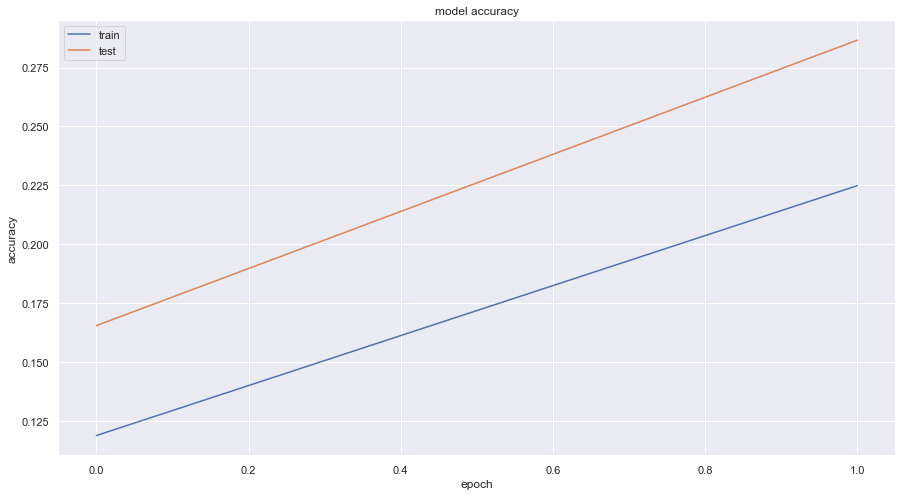

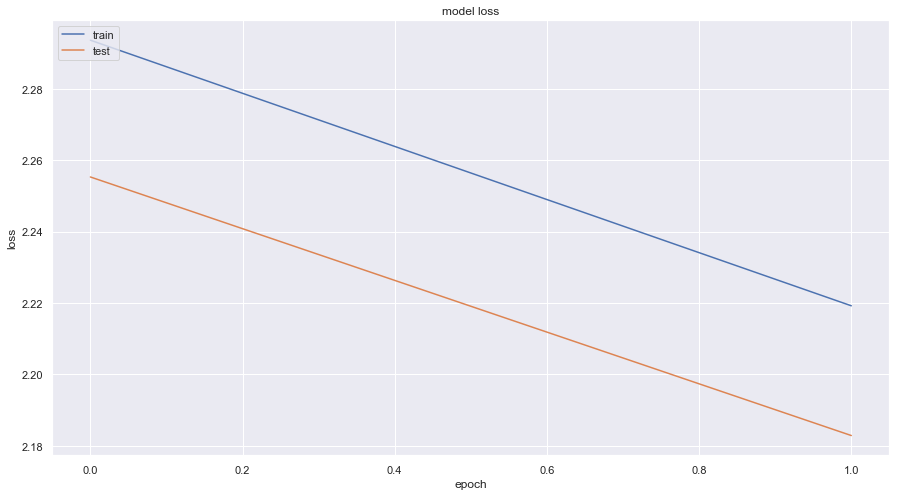

In [58]:
plotLearningCurves(h)

### Callbacks

Allows to program the saving of models at each iteration, the adaptation of the learning rate, an early stopping procedure etc.

See <https://keras.io/callbacks/>

In [68]:
es = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, mode='auto')
h = model.fit(
    X_train, y_train,
    epochs=2,
    batch_size=16,
    verbose=1,
    validation_split=0.33,
    callbacks=[es]
)

Train on 40199 samples, validate on 19801 samples
Epoch 1/2
40199/40199 [==============================] - 3s 73us/sample - loss: 2.1462 - acc: 0.3365 - val_loss: 2.1103 - val_acc: 0.3798
Epoch 2/2
40199/40199 [==============================] - 3s 73us/sample - loss: 2.0721 - acc: 0.4176 - val_loss: 2.0353 - val_acc: 0.4510


### Learning a MLP

## 5. Embedding Keras in SKLearn (Grid Search / Cross Validation)

## 6. To Do : Mise au point d'un classifieur profond sur les données Mnist

https://www.kaggle.com/c/digit-recognizer


### i. Mettez en évidence le comportement de l'optimisation  avec un pas de gradient trop petit, trop grand




On va créer 3 DNN, chacun avec le même loss et optimizer, au pas de gradient près. En effet, la seule chose qui changera sera :
- lr = 0.000001 pour le premier test
- lr = 0.001 pour le deuxième
- lr = 0.1 pour le dernier

Les résultats seront affichés dans cet ordre

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=784, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

sgd1 = SGD(lr=0.000001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd1,
              metrics=['accuracy'])

h1 = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    verbose=0,
    validation_split=0.33,
    callbacks=[es]
)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=784, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

sgd2 = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd2,
              metrics=['accuracy'])

h2 = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    verbose=0,
    validation_split=0.33,
    callbacks=[es]
)

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=784, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

sgd3 = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd3,
              metrics=['accuracy'])

h3 = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    verbose=0,
    validation_split=0.33,
    callbacks=[es]
)

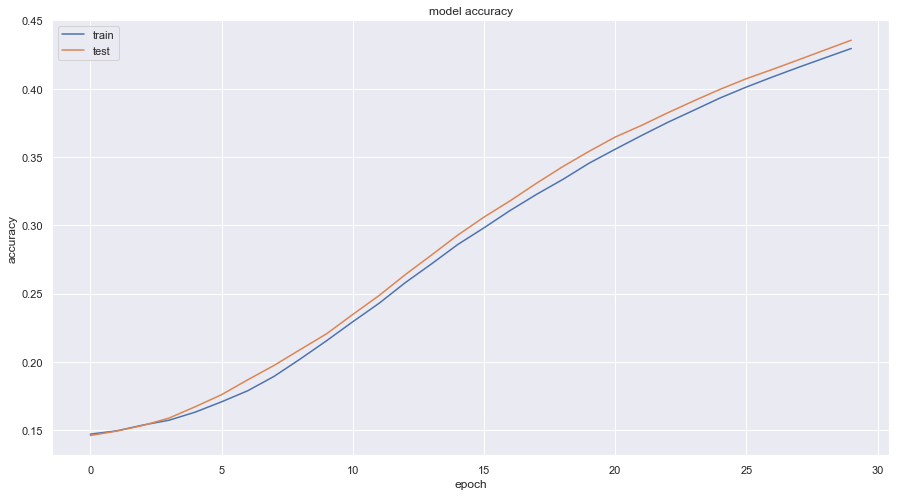

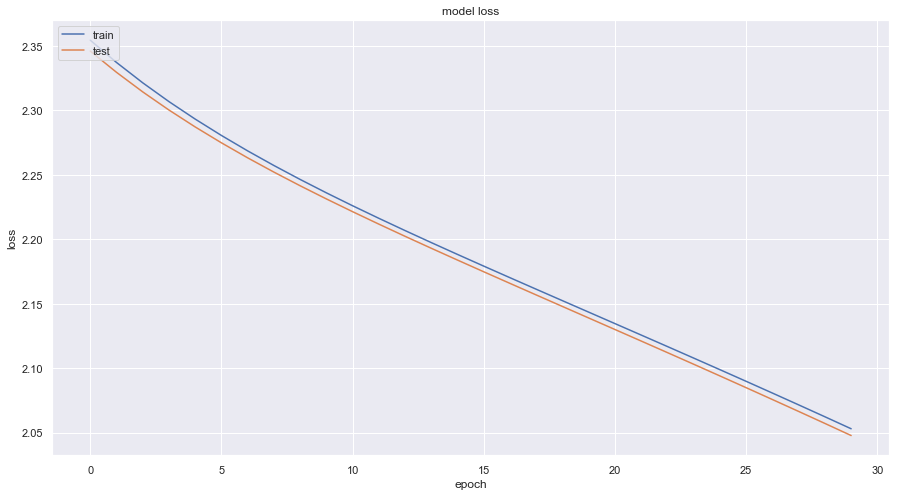

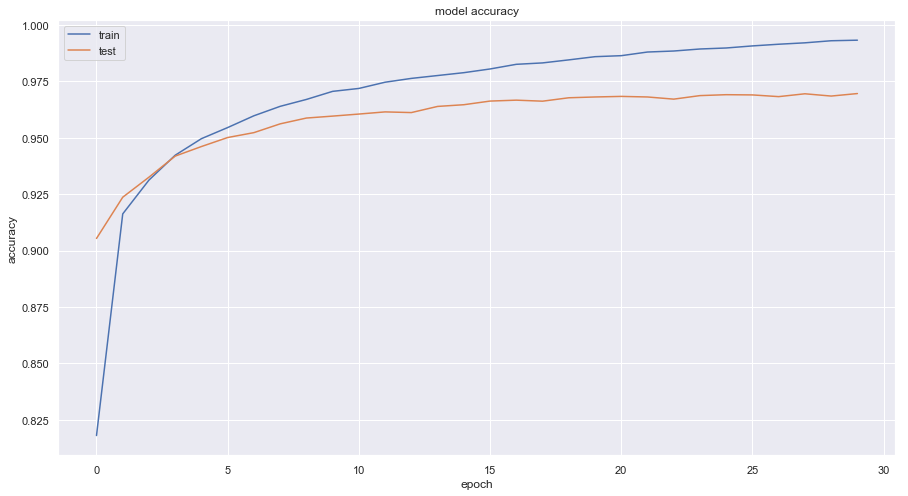

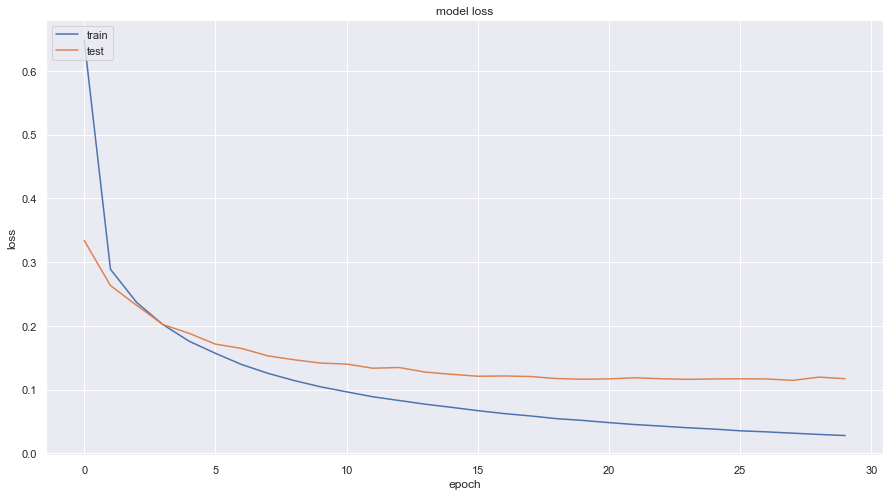

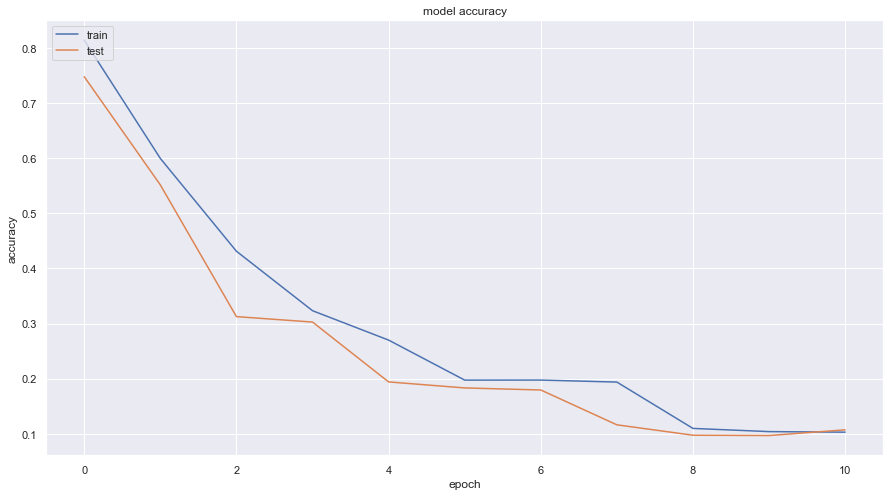

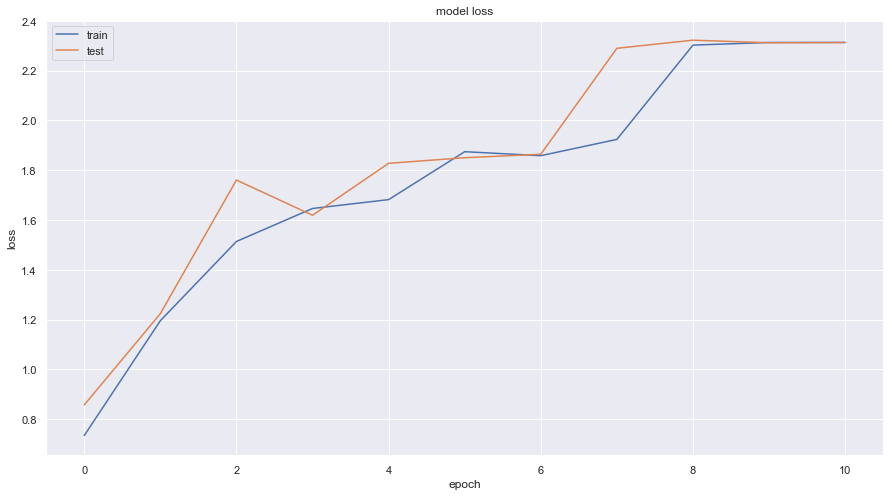

In [84]:
plotLearningCurves(h1)
plotLearningCurves(h2)
plotLearningCurves(h3)

## Summary
The first learning rate is so small that there is a slow optimization to the point that it is almost invisible.
The second one is quite correct, the optimization is done relatively quickly.
The last one gets worse as the epochs progress. This is due to the fact that the learning rate is too high, which causes our calculations to oscillate/diverge completely.

# Make a sudmission on Kaggle

You need to:

- Register on Kaggle;
- Retrieve the data from the digit-recognizer competition https://www.kaggle.com/c/digit-recognizer/data;
- Retrieve the data;
- Submit predictions on test data based on the code examples given in TP1;
- Provide me by Thursday, December 21 with your Kaggle login and the performance obtained;

To do this, you can follow, in particular, the tracks mentioned below (not exclusive). 

In any case, you should make sure you have a good estimate of the generalization performance before submitting a RUN on Kaggle.

#### Hint 1 : Augment the quantity of data and their variability
- by adding noise;
- by adding mirror images.

#### Hint 2 : Dropout

https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf

In [19]:
# Read the data
train = pd.read_csv('train.csv')
labels = train.iloc[:,0].values.astype('int32')
X_train = (pd.read_csv('train.csv').iloc[:,1:].values).astype('float32')
X_test = (pd.read_csv('test.csv').values).astype('float32')

In [21]:
# One-hot encoding the target so the euclidian distance has a sense
y_train = np_utils.to_categorical(labels) 
# Preprocess the data
mean = np.mean(X_train)
scale = np.max(X_train)
X_train = (X_train - mean) / scale
X_test = (X_test - mean) / scale
input_dim = X_train.shape[1]
nb_classes = y_train.shape[1]

We define our neural network, which is the same as below but with dropouts as found online. Decreases the probability of overfitting.

In [7]:
# Function to create model, required for KerasClassifier
def createModel(optimizer='rmsprop', init='glorot_uniform', nb_neurons=512):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=784, activation='relu'),
        tf.keras.layers.Dropout(0.150),
        tf.keras.layers.Dense(nb_neurons/2, activation='relu'),
        tf.keras.layers.Dropout(0.150),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return(model)

### Grid Search on params for DNN
We are making a grid search to select the best params for our optimizer, initializer and batch size.

In [ ]:
model = KerasClassifier(build_fn=createModel)
optimizers = ['rmsprop', 'adam', 'sgd']
init = ['glorot_uniform', 'normal']
epochs = [20]
batches = [5, 10, 20]

param_grid = dict(optimizer=optimizers, init=init, nb_epoch=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [101]:
# let's build our prediction file with gridsearch results
model = create_Mdel((optimizer='adam', init='glorot_uniform'))
print("Training...")
model.fit(X_train, y_train, nb_epoch=20, batch_size=20, validation_split=0.1)
print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)

Training...
Train on 37800 samples, validate on 4200 samples
Epoch 1/20
37800/37800 [==============================] - 10s 260us/step - loss: 0.1901 - acc: 0.9423 - val_loss: 0.1502 - val_acc: 0.9545
Epoch 2/20
37800/37800 [==============================] - 7s 183us/step - loss: 0.1320 - acc: 0.9579 - val_loss: 0.1424 - val_acc: 0.9560
Epoch 3/20
37800/37800 [==============================] - 7s 184us/step - loss: 0.1024 - acc: 0.9681 - val_loss: 0.1238 - val_acc: 0.9624
Epoch 4/20
37800/37800 [==============================] - 7s 184us/step - loss: 0.0887 - acc: 0.9708 - val_loss: 0.1116 - val_acc: 0.9686
Epoch 5/20
37800/37800 [==============================] - 7s 189us/step - loss: 0.0774 - acc: 0.9748 - val_loss: 0.1391 - val_acc: 0.9595
Epoch 6/20
37800/37800 [==============================] - 7s 185us/step - loss: 0.0669 - acc: 0.9783 - val_loss: 0.1104 - val_acc: 0.9688
Epoch 7/20
37800/37800 [==============================] - 7s 186us/step - loss: 0.0585 - acc: 0.9804 - val_los

In [ ]:
def writePreds(preds, fname):
    return(pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True))

In [ ]:
writePreds(preds, "kaggle-mlp.csv")

### Dataset augmentation

Results are satisfying (validation accuracy = 0.9729) but to go further let's try to augment the train dataset with noisy and mirror images. This should increase test performance by making our DNN more robust.

In [23]:
mu = 0
sigma = 0.25
X_train_noisy = np.clip(sigma*np.random.randn(42000, 784)+X_train+mu, 0, 1)

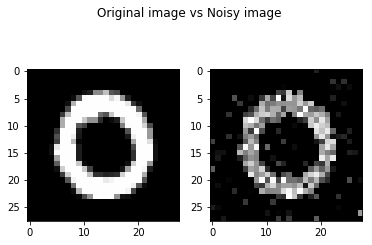

In [31]:
preview = np.zeros((28, 28))
preview_noisy = np.zeros((28, 28))
num_list = 1

for i in range(28):
    for j in range(28):
        preview[i,j] = X_train[num_list, i*28+j]
        preview_noisy[i,j] = X_train_noisy[num_list, i*28+j]
        
plt.gray()
f, (ax1, ax2) = plt.subplots(1, 2);
ax1.imshow(preview, interpolation='nearest')
ax2.imshow(preview_noisy, interpolation='nearest')
f.suptitle('Original vs noisy image')
plt.show()

In [33]:
X_train_augmented = np.concatenate((X_train, X_train_noisy))
y_train_augmented = np.concatenate((y_train, y_train))

In [37]:
#let's build a prediction file with gridsearch results on new dataset
model = createModel(optimizer='adam', init='glorot_uniform')
print("Training...")
model.fit(X_train_augmented, y_train_augmented, nb_epoch=100, batch_size=32, validation_split=0.1)
print("Generating test predictions...")
preds = model.predict_classes(X_test, verbose=0)
write_preds(preds, "kaggle-mlp-2.csv")

Training...
Train on 75600 samples, validate on 8400 samples
Epoch 1/30
75600/75600 [==============================] - 71s 942us/step - loss: 0.0409 - acc: 0.9858 - val_loss: 0.0199 - val_acc: 0.9927
Epoch 2/30
75600/75600 [==============================] - 67s 889us/step - loss: 0.0206 - acc: 0.9929 - val_loss: 0.0143 - val_acc: 0.9953
Epoch 3/30
75600/75600 [==============================] - 68s 899us/step - loss: 0.0160 - acc: 0.9945 - val_loss: 0.0134 - val_acc: 0.9953
Epoch 4/30
75600/75600 [==============================] - 70s 924us/step - loss: 0.0127 - acc: 0.9957 - val_loss: 0.0117 - val_acc: 0.9960
Epoch 5/30
75600/75600 [==============================] - 71s 938us/step - loss: 0.0114 - acc: 0.9963 - val_loss: 0.0113 - val_acc: 0.9964
Epoch 6/30
75600/75600 [==============================] - 72s 954us/step - loss: 0.0102 - acc: 0.9967 - val_loss: 0.0108 - val_acc: 0.9965
Epoch 7/30
75600/75600 [==============================] - 69s 907us/step - loss: 0.0091 - acc: 0.9970 - v